In [31]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
train_X = np.load('HandwrittenDigits/TrainDigits.npy')
train_y = np.load('HandwrittenDigits/TrainLabels.npy')

test_X = np.load('HandwrittenDigits/TestDigits.npy')
test_y = np.load('HandwrittenDigits/TestLabels.npy')

For each digit d = 0, 1, 2, . . . , 9, stack training images in front of each other and form
a matrix $A_d$ (so 10 big matrices).

In [33]:
A = []

X_Y_combined = np.concatenate((train_X, train_y)).T

for digit in range(10):
    A.append(X_Y_combined[np.where(X_Y_combined[:,-1] == digit)])

In [34]:
A_x = [A_d[:,:-1].T for A_d in A]

In [35]:
A_x[0].shape

(784, 24000)

(training): Compute the SVD of each $A_d$ = U Σ V T and then let the columns of $U_k$ be the first k columns of U and use them as an approximation space. (10 SVD, one
for each digit d.)

In [36]:
def get_svd(digits, A_x, k):
    U_s = []
    S_s = []
    for digit in digits:
        # Use only n = 400 training images for each digit
        U, S, Vt = np.linalg.svd(A_x[digit][:,:400])
        U_s.append(U[:,:k])
        S_s.append(S[:k])

    return U_s, S_s

In [37]:
k = 25
U_s, S_s = get_svd([3,8], A_x, k=k)

For training matrices of digits 3 and 8 (each of size 784 × 400), compute the SVD and plot the singular values (one plot for each digit). 

Text(0.5, 1.0, 'First k singular values for digit class 3')

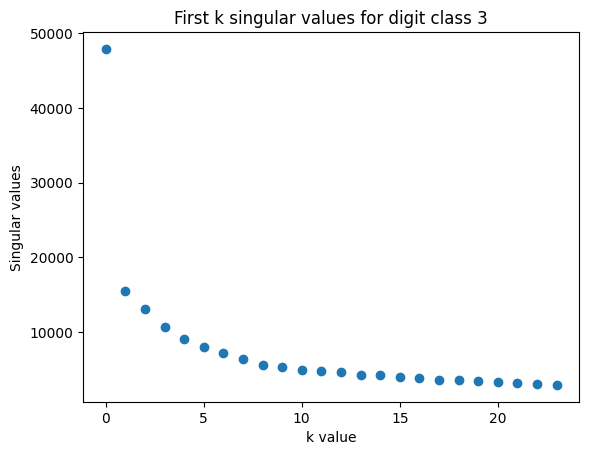

In [130]:
# for digit 3, plotted singular values
plt.scatter(range(k),S_s[0])
plt.xlabel('k value')
plt.ylabel('Singular values')
plt.title('First k singular values for digit class 3')

Text(0.5, 1.0, 'First k singular values for digit class 8')

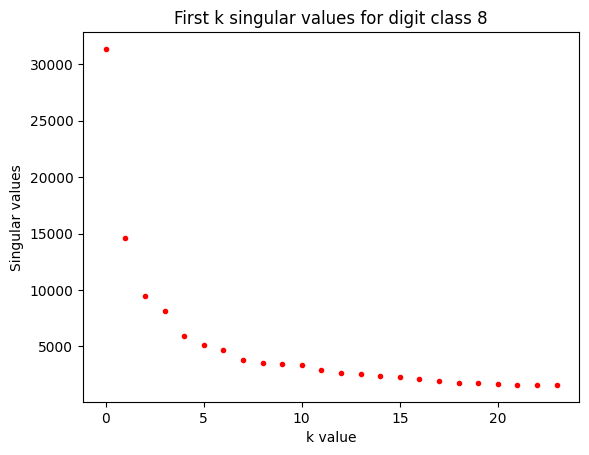

In [136]:
# for digit 8, plotted singular values
plt.plot(range(k),S_s[1],'r.')
plt.xlabel('k value')
plt.ylabel('Singular values')
plt.title('First k singular values for digit class 8')

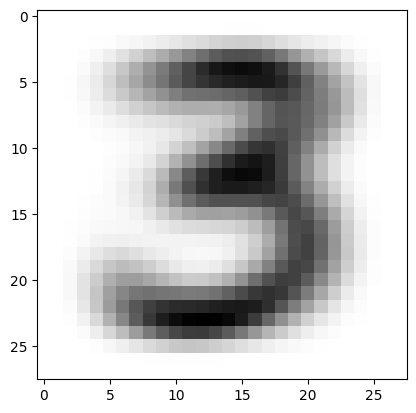

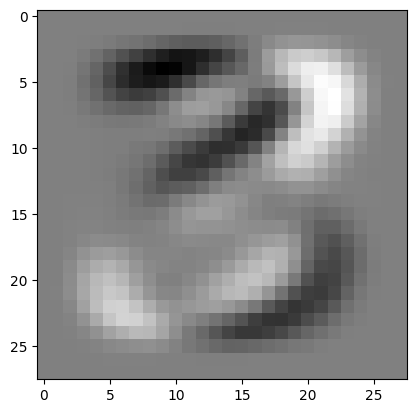

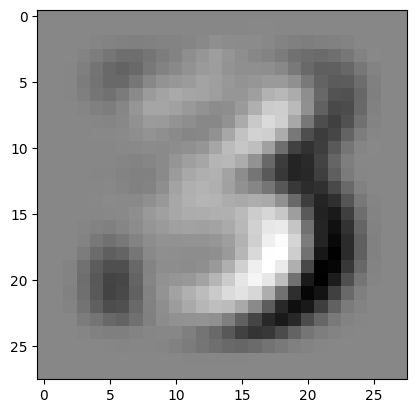

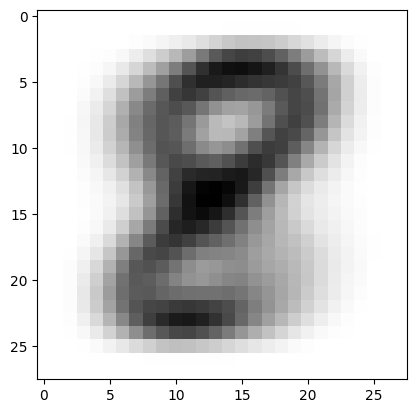

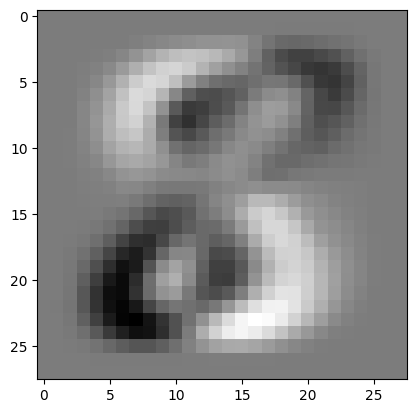

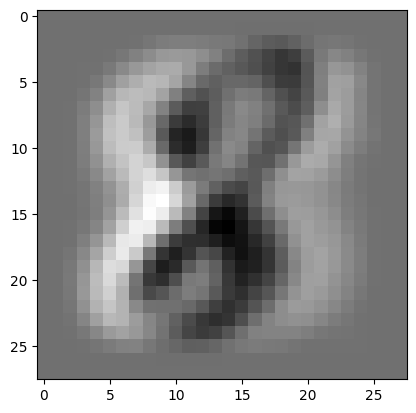

In [40]:
# First three Singular images of 
# 1) digit 3
# 2) digit 8
for digit in range(2):
    for singular_img in range(3):
        d = U_s[digit][:,singular_img]
        D = np.reshape(d, (28,28)).T
        plt.imshow(D, cmap="gray")
        plt.show()

In [113]:
# delta = test_X
test = []
test_combined = np.concatenate((test_X, test_y)).T

for digit in range(10):
    test.append(test_combined[np.where(test_combined[:,-1] == digit)])

In [114]:
deltas = [digit_batch[:,:-1].T for digit_batch in test]
labels = [digit_batch[:,-1] for digit_batch in test]

In [115]:
labels[3]

array([3, 3, 3, ..., 3, 3, 3], shape=(4000,), dtype=uint8)

(classification): Test the algorithm on test images and compare your classifications 
- Compute the relative residual in all ten bases, and take the minimum residual out of the 10 received values.

In [126]:
digit_classifications = []
for index, delta in enumerate(deltas):
    accuracies = []
    for k in range(1,25):
        U_s, S_s = get_svd(np.arange(10), A_x, k=k)
        norms = []

        for digit in range(10):
            precomputed = U_s[digit] @ U_s[digit].T
            norms.append(np.linalg.norm(np.dot(np.eye(784)-precomputed, delta), axis=0))
        
        preds = np.argmin(np.array(norms), axis=0)
        true = labels[index].squeeze()

        accuracy = len(np.where(preds == true)[0])/len(true)
        accuracies.append(accuracy)
    digit_classifications.append(accuracies)

Use different values k = 5, 6, . . . , 15 (number of
basis functions), and report the percentage of the success of this SVD-based algorithm for each digit with different k values separately.

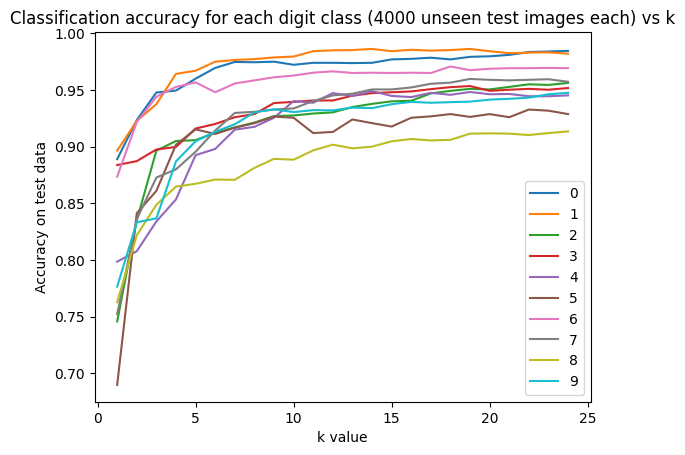

In [127]:
# x: different values of k (in approximation of the SVD),
# y: the accuracy on test data
for accuracy in digit_classifications:
    plt.plot(range(1, 25), accuracy)

plt.xlabel('k value')
plt.ylabel('Accuracy on test data')
plt.title('Classification accuracy for each digit class (4000 unseen test images each) vs k')
plt.legend(range(10))
plt.show()

(classification) testing on all 40,000 data points, and the total test accuracy

In [124]:
accuracy_whole = []
for k in range(1,25):
    U_s, S_s = get_svd(np.arange(10), A_x, k=k)
    norms = []

    for digit in range(10):
        precomputed = U_s[digit] @ U_s[digit].T
        norms.append(np.linalg.norm(np.dot(np.eye(784)-precomputed, test_X), axis=0))
    
    preds = np.argmin(np.array(norms), axis=0)
    true = test_y.squeeze()

    accuracy = len(np.where(preds == true)[0])/len(true)
    accuracy_whole.append(accuracy)

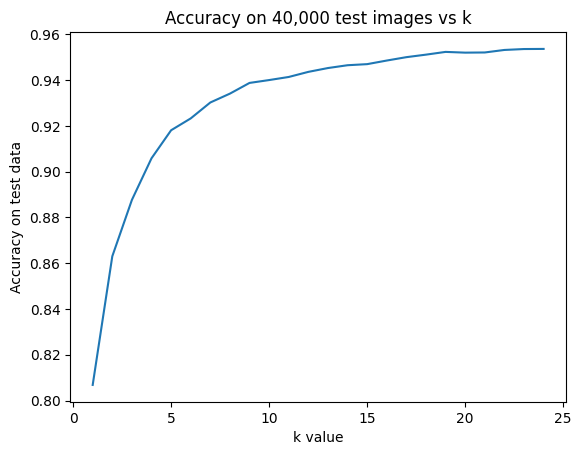

In [125]:
plt.plot(range(1, 25), accuracy_whole)
plt.xlabel('k value')
plt.ylabel('Accuracy on test data')
plt.title('Accuracy on 40,000 test images vs k')
plt.show()